In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [18]:
df.shape

(11251, 15)

In [19]:
df.head(15)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


# Data Cleaning 

In [21]:
df.info()
# in this info we will see we have 2 blank columns so we have to drop them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
# Drop Blank Columns 
df.drop(['Status', 'unnamed1'], axis = 1 , inplace  = True)

In [24]:
# To Check Null Values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
# To Drop Null Values
df.dropna(inplace = True)

In [71]:
# To correct values in Marital_Status column 
df['Marital_Status'] = df['Marital_Status'].replace({0:'Married',1:'Single'})

In [72]:
# To Change Data Type of 'Amount' to int 
df['Amount'] = df['Amount'].astype('int')

In [73]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [74]:
# To Change Column Name 
df.rename(columns = {'Cust_name':'Customer_Name'},inplace = True)

In [75]:
# To get Basic Descibtion of numeric Columns 
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Data Filtering

In [115]:
# Number of Customer as per Zone 
df['Zone'].value_counts()

Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: Zone, dtype: int64

In [114]:
# Top 10 Purchase by amount 
df.sort_values(by = 'Amount' , ascending = False).head(10)

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Single,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Single,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Single,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,Single,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,Single,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,Married,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,Single,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,Married,Delhi,Central,Banking,Auto,1,23770


In [117]:
# list of purchase where number of order is above 3
df[df['Orders']>3]

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
6,1001132,Balk,P00018042,F,18-25,25,Single,Uttar Pradesh,Central,Lawyer,Auto,4,23841
9,1003650,Ginny,P00031142,F,26-35,26,Single,Andhra Pradesh,Southern,Media,Auto,4,23799
13,1001680,Vasudev,P00324942,M,26-35,26,Single,Andhra Pradesh,Southern,Automobile,Auto,4,23718
20,1000113,Ellis,P00180642,F,18-25,19,Single,Andhra Pradesh,Southern,Govt,Auto,4,23546
27,1004736,Mahima,P00058042,F,18-25,25,Single,Andhra Pradesh,Southern,Banking,Auto,4,23451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11219,1004268,Rosenblatt,P00302942,M,46-50,48,Married,Himachal Pradesh,Northern,Govt,Office,4,580
11223,1001542,Buch,P00113642,F,18-25,20,Single,Maharashtra,Western,Aviation,Office,4,574
11236,1002168,Hightower,P00145842,M,0-17,17,Single,Himachal Pradesh,Northern,Agriculture,Office,4,560
11246,1000695,Manning,P00296942,M,18-25,19,Single,Maharashtra,Western,Chemical,Office,4,370


# Exploratory Data Analysis

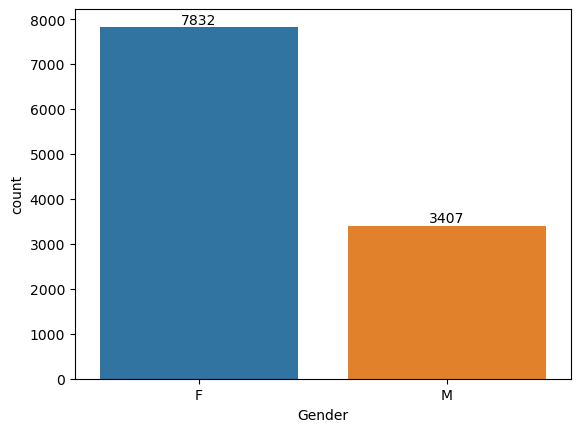

In [42]:
# To get Gender wise bar chart for Customer Count
xa = sns.countplot(x = 'Gender', data = df)

for bars in xa.containers:
    xa.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

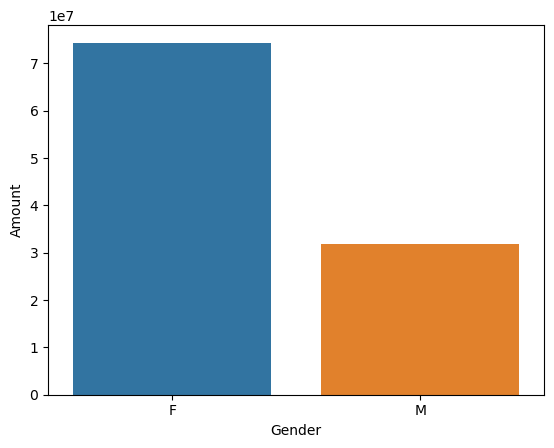

In [52]:
# Sales amount by gender
sales_gen = df.groupby(['Gender'] , as_index = False)['Amount'].sum().sort_values( by = 'Amount' , ascending = False)

sns.barplot(x = 'Gender', y = 'Amount' , data = sales_gen)

From above Graphs we can see that most of the buyers are females and even Spendings of females are greater then men 

# Age

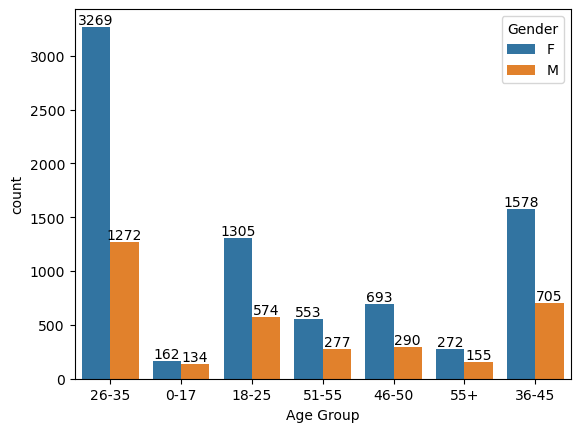

In [51]:
# Customers by Age Group and Gender
ax = sns.countplot(data = df, x = "Age Group", hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

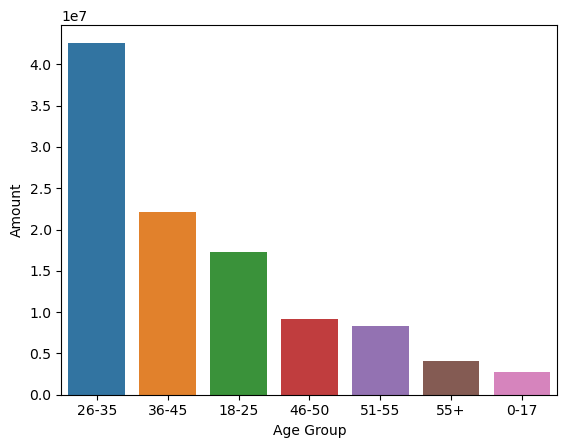

In [54]:
# Total sales amount by Age Group
sales_age = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values( by = 'Amount' , ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount' , data = sales_age)

From above Graphs we can see that most of the buyers are from age group 26-35 and are females

# State

<Axes: xlabel='State', ylabel='Orders'>

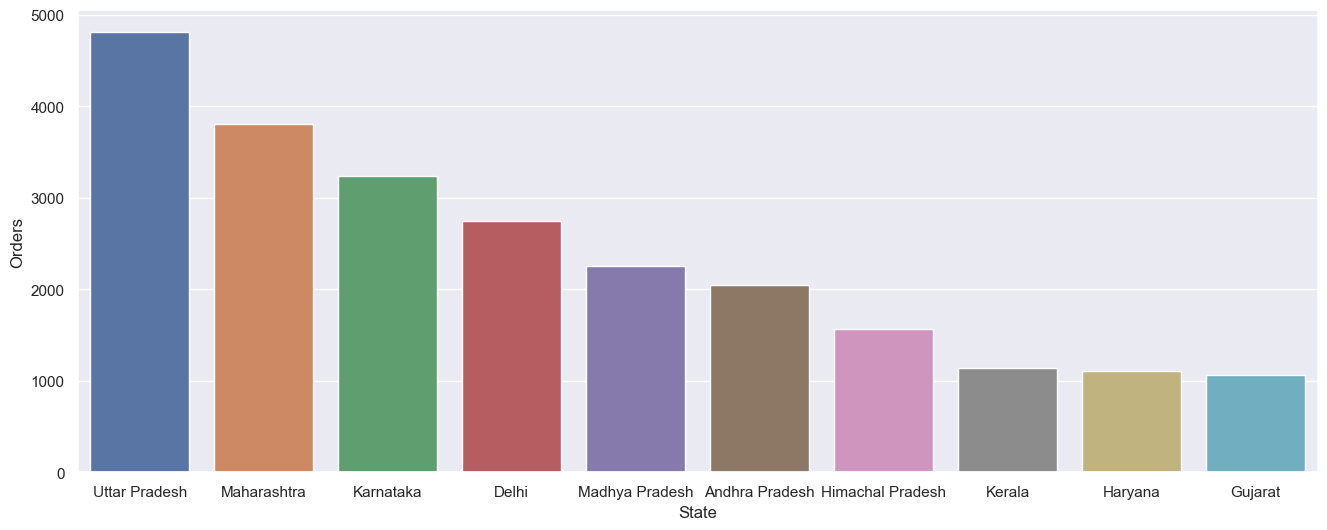

In [69]:
# Top 10 State as Number of Orders
sales_state = df.groupby(['State'] , as_index = False)['Orders'].sum().sort_values( by = 'Orders' , ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,6)})

sns.barplot(x = 'State', y = 'Orders' , data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

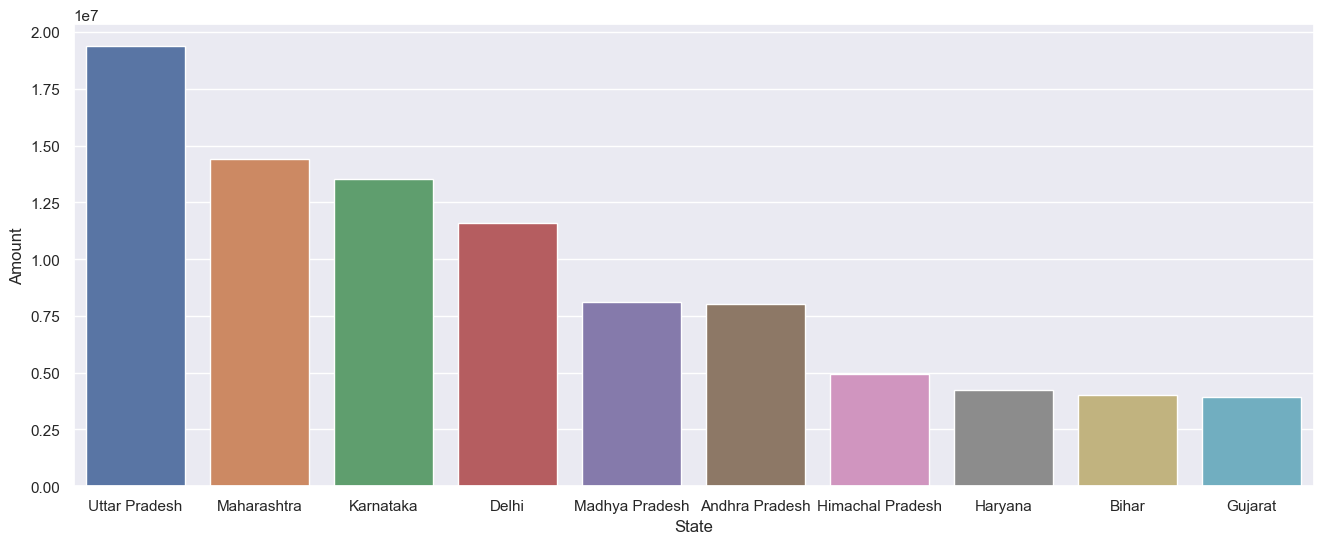

In [70]:
# Top 10 State as per Sum of sales 
sales_state = df.groupby(['State'] , as_index = False)['Amount'].sum().sort_values( by = 'Amount' , ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,6)})

sns.barplot(x = 'State', y = 'Amount' , data = sales_state)

From above graphs we can see that most of the orders and total sales amount is from uttar pradesh, maharashtra, karnataka respectively

# Marital Status

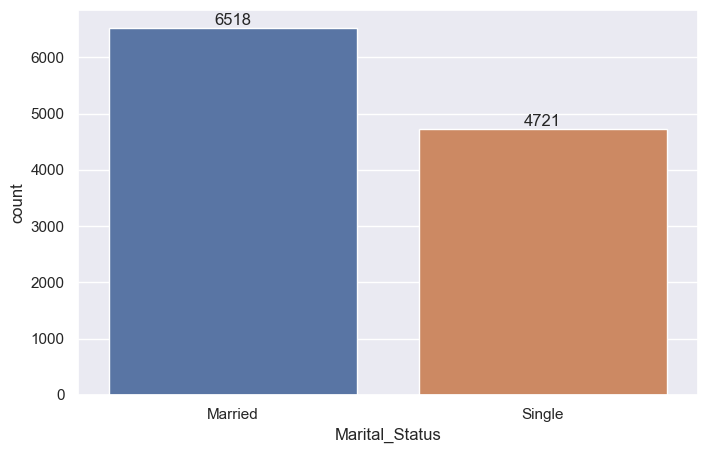

In [85]:
# Number of customers as per marital status 
xa = sns.countplot(data = df , x = 'Marital_Status')

sns.set(rc={'figure.figsize':(6,4)})

for bars in xa.containers:
    xa.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

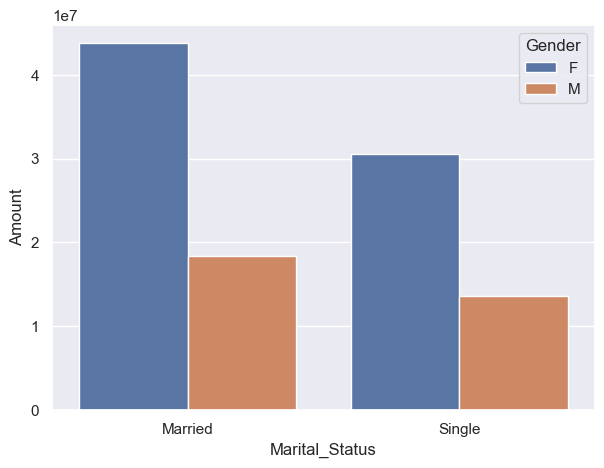

In [90]:
# Total sales as per marital status and gender 
sales_ms = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' ,ascending = False)

sns.set(rc= {'figure.figsize':(7,5)})

sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_ms, hue = 'Gender')

Most of the buyers are Married womens and they also contributes to highest amounts of sales 

# Occupation 

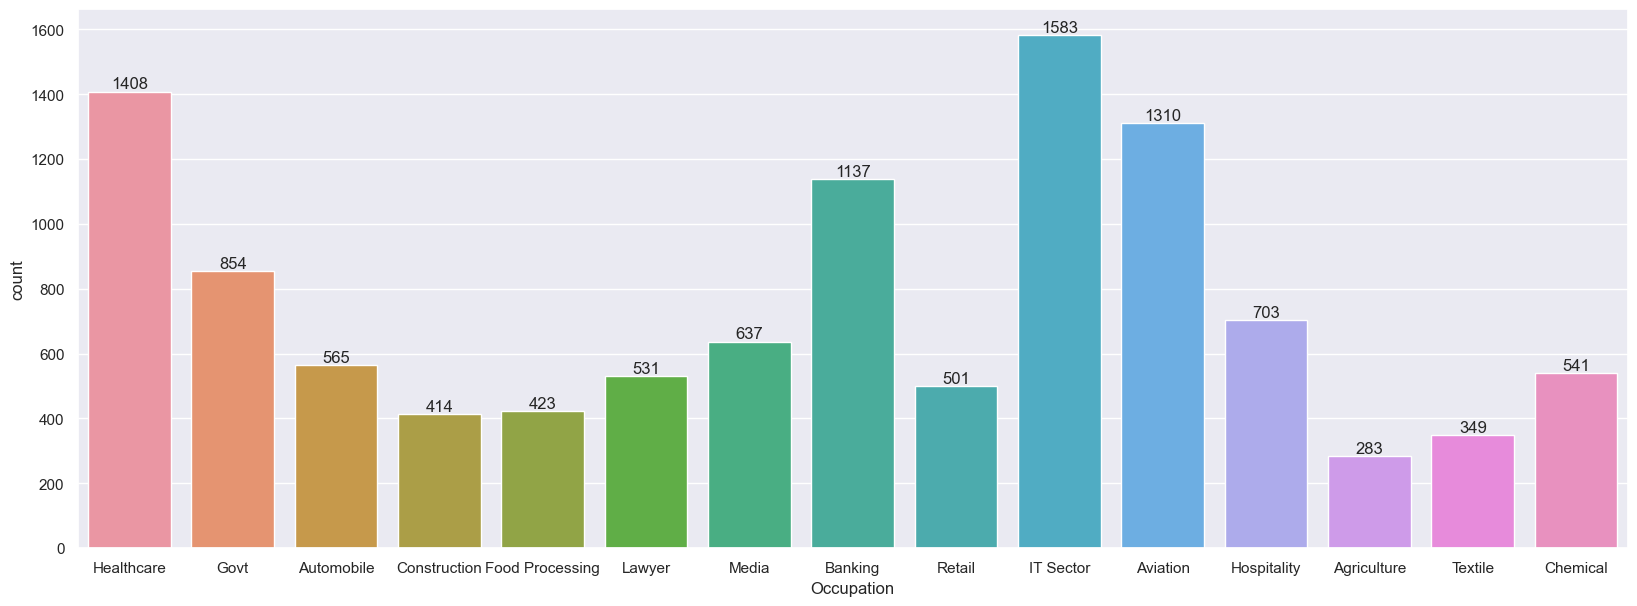

In [94]:
# Number of customer as per Occupation 
sns.set(rc={'figure.figsize':(20,7)})

ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

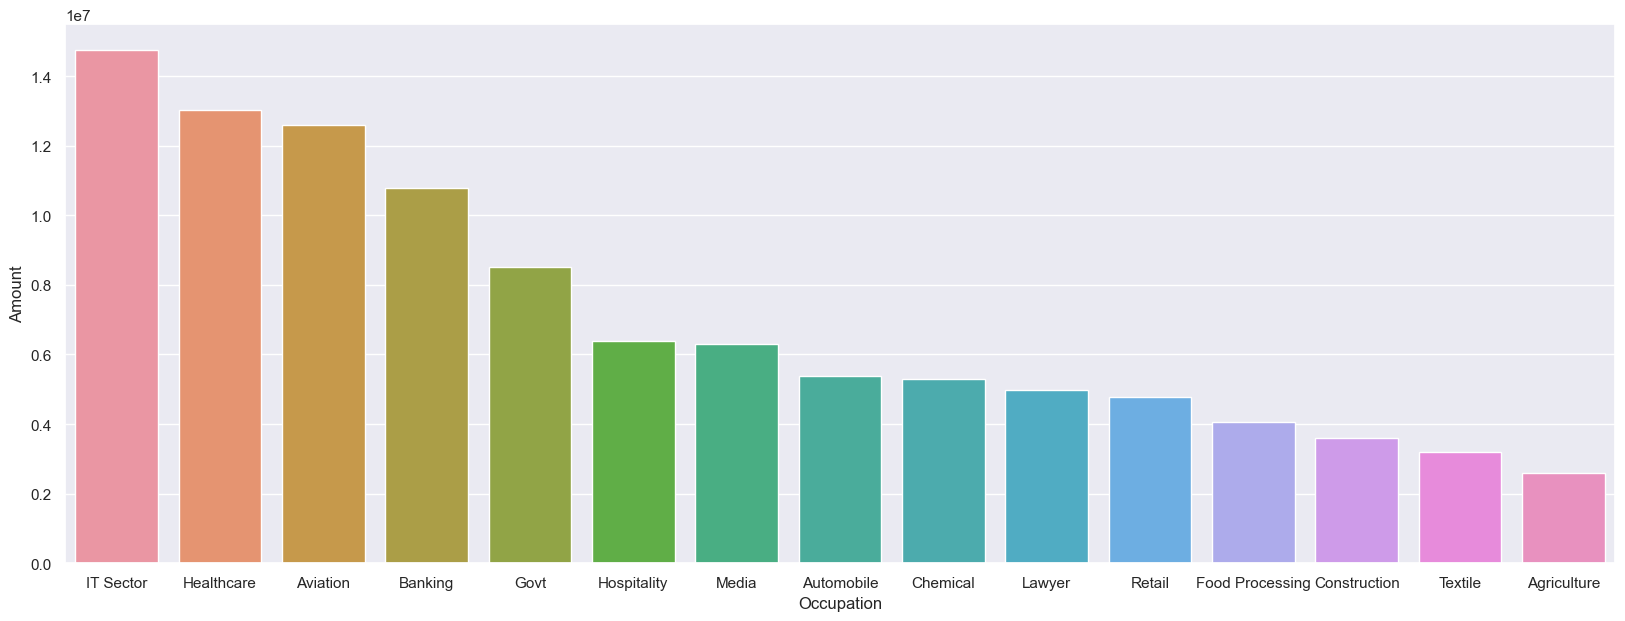

In [96]:
# Total sales amoont as per customer occupation
sales_occu = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(20,7)})

sns.barplot(x = 'Occupation' , y = 'Amount' , data = sales_occu)

Here we see that most of they buyers are working in IT, Healthcare and Aviation sector

# Product_Category

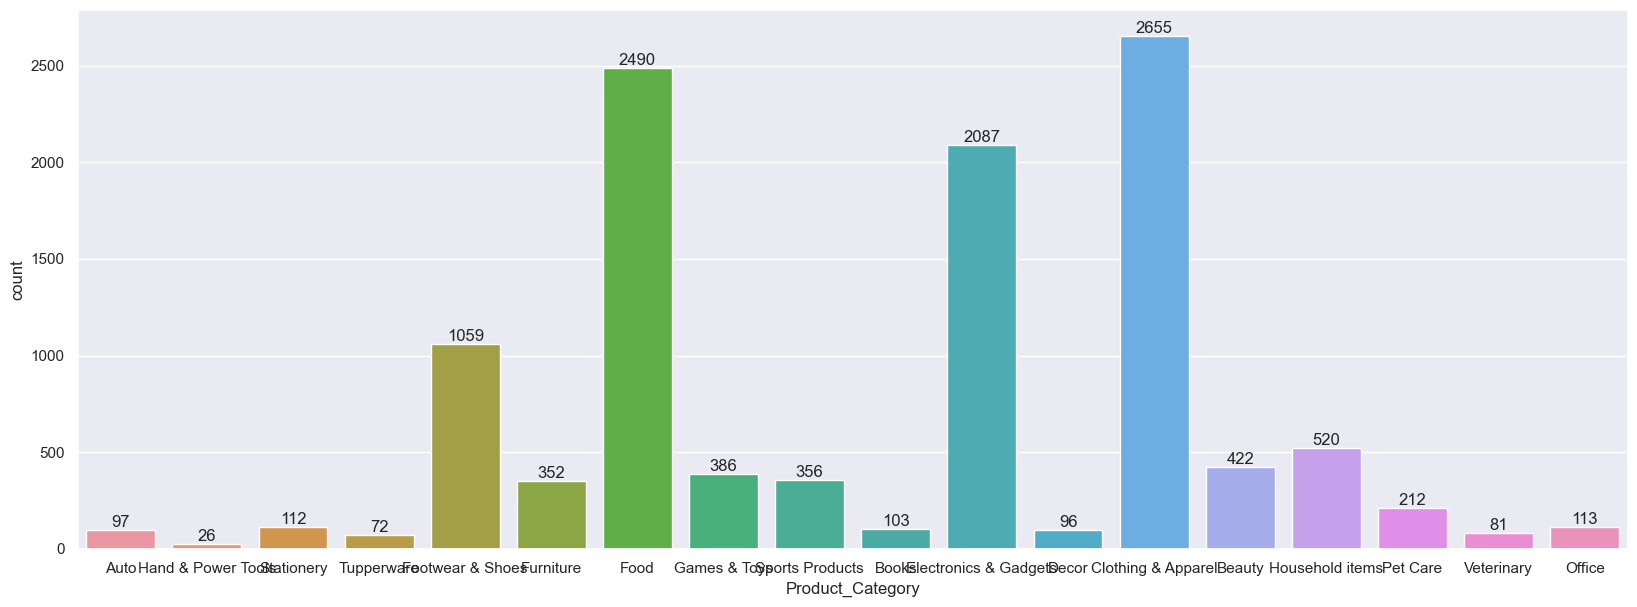

In [106]:
# Count of customer as per Product category
ax = sns.countplot(x = 'Product_Category', data = df,)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

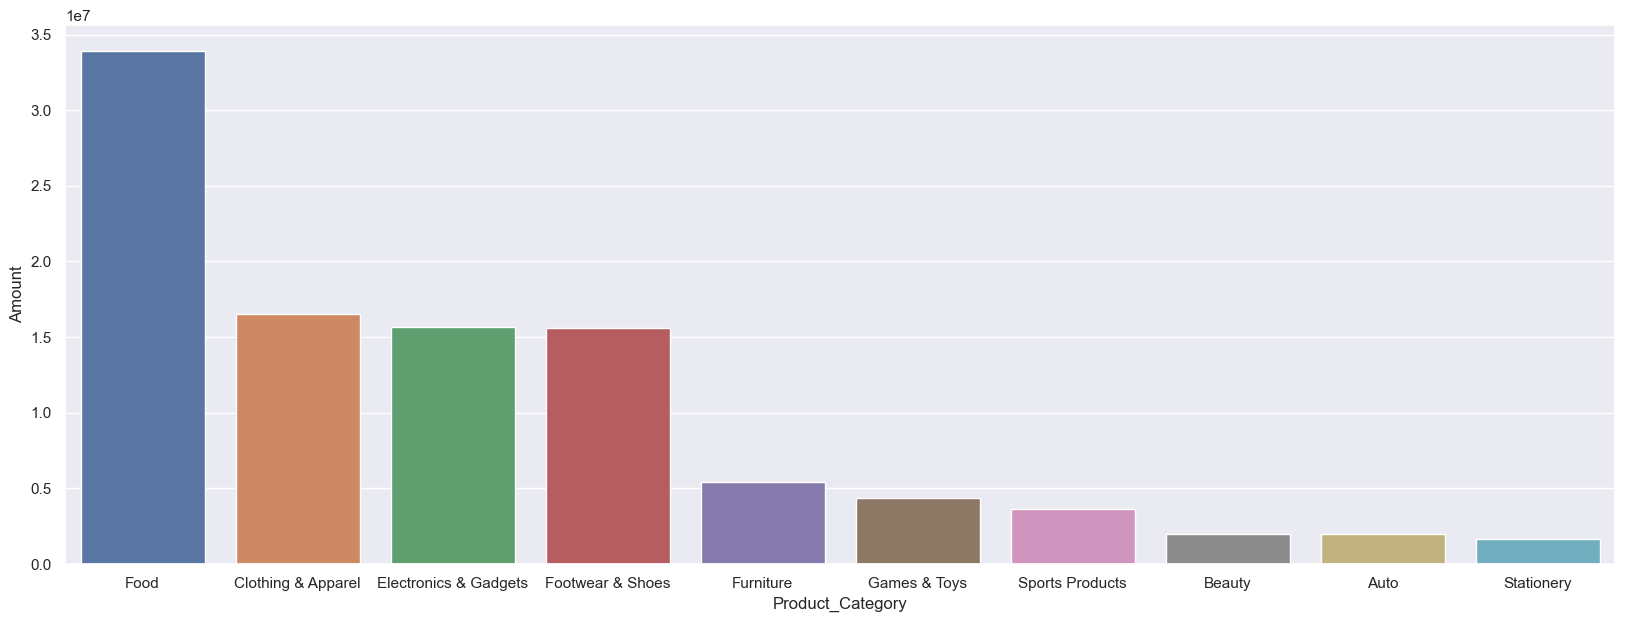

In [108]:
# Top 10 Product category as per sales amount 
sales_Pc = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,7)})

sns.barplot(x = 'Product_Category' , y = 'Amount' , data = sales_Pc)

From they above graphs we can see that most of the sold products are from food, clothing and electronics category

# Short Conclusion


Married Women from age-group of 26-25 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing adn electronics category

LinkedIn : https://www.linkedin.com/in/navneet-rathore-307805238/